# Imports


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Dataset

**Dataset Name:** Job Salary Prediction

**Description:** This dataset contains **(1000 rows and 7 colums)** simulated data representing various factors that impact job salary levels, including education, experience, location, job title, age, and gender. This dataset is taken from Kaggle.

**Features:**
1. **Education:** Categorical variable indicating the highest level of education attained by an individual.
2. **Experience:** Integer variable representing the number of years of professional experience.
3. **Location:** Categorical variable denoting the geographical location of employment.
4. **Job_Title:** Categorical variable indicating the job title or position held by an individual.
5. **Age:** Integer variable representing the age of the individual.
6. **Gender:** Categorical variable representing the gender of the individual.
7. **Salary:** Continuous variable representing the annual salary of the individual.

**Source:** https://www.kaggle.com/datasets/mrsimple07/salary-prediction-data/data

**Goal:** This supervised task focuses on predicting salaries using factors like age, gender, education level, job title, location and work experience.


# Data Preparation

In [ ]:
# Load the dataset

df = pd.read_csv("data/salary_prediction_data.csv")

In [3]:
# Display dataset information and initial analysis

print("Dataset Information: \n")
df.head()

Dataset Information: 



,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [4]:
# Check dimensions of the dataset

df.shape

(1000, 7)

In [5]:
# Check for missing values

df.isnull().sum()

,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,0
Gender,0
Salary,0


In [6]:
# Check for duplicate values

df.duplicated().sum()

0

In [7]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


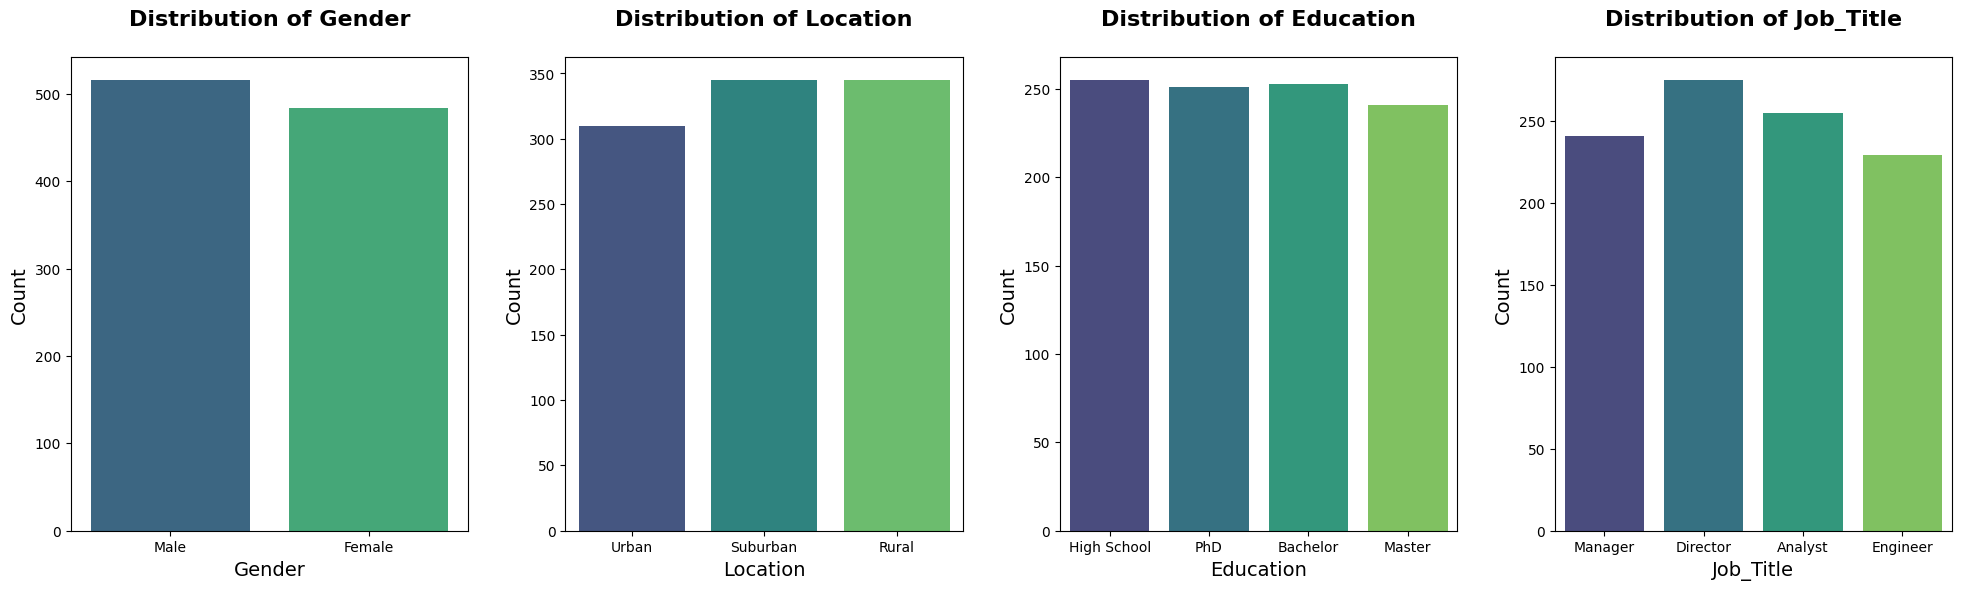

In [8]:
# Data distribution of Discrete features

discrete_features = ['Gender', 'Location', 'Education', 'Job_Title']

# Create a figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Loop through the features and create count plots
for ax, feature in zip(axes.flatten(), discrete_features):
    sns.countplot(x=feature, data=df, ax=ax, palette="viridis")
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_title(f'Distribution of {feature}', fontsize=16, fontweight='bold', y=1.05)

# Adjust layout for better visibility and add space between subplots
plt.subplots_adjust(hspace=10, wspace=20)

# Show the plots
plt.tight_layout()
plt.show()

**Distribution of Discrete Data**


1. **Gender Distribution:** The workforce shows a near equal split between males and females, with a slightly higher representation of males. This suggests balanced gender participation, but opportunities for other genders remain limited.

2. **Education Distibution:** There is a relatively even distribution across education levels, with high school graduates, bachelor's degree holders, and PhD professionals being most common, closely followed by master’s degree holders. This indicates a diverse range of educational backgrounds in the workforce.

3. **Job Distribution:** The roles are fairly well-distributed, with Directors leading, followed by Analysts, Managers, and Engineers. This distribution suggests a significant presence of leadership and analytical roles in comparison to technical positions.

4. **Location Distribution:** Suburban and rural areas each show a stronger representation compared to urban locations, indicating that professionals are increasingly located in areas outside of major cities, possibly due to factors like remote work or lower living costs.



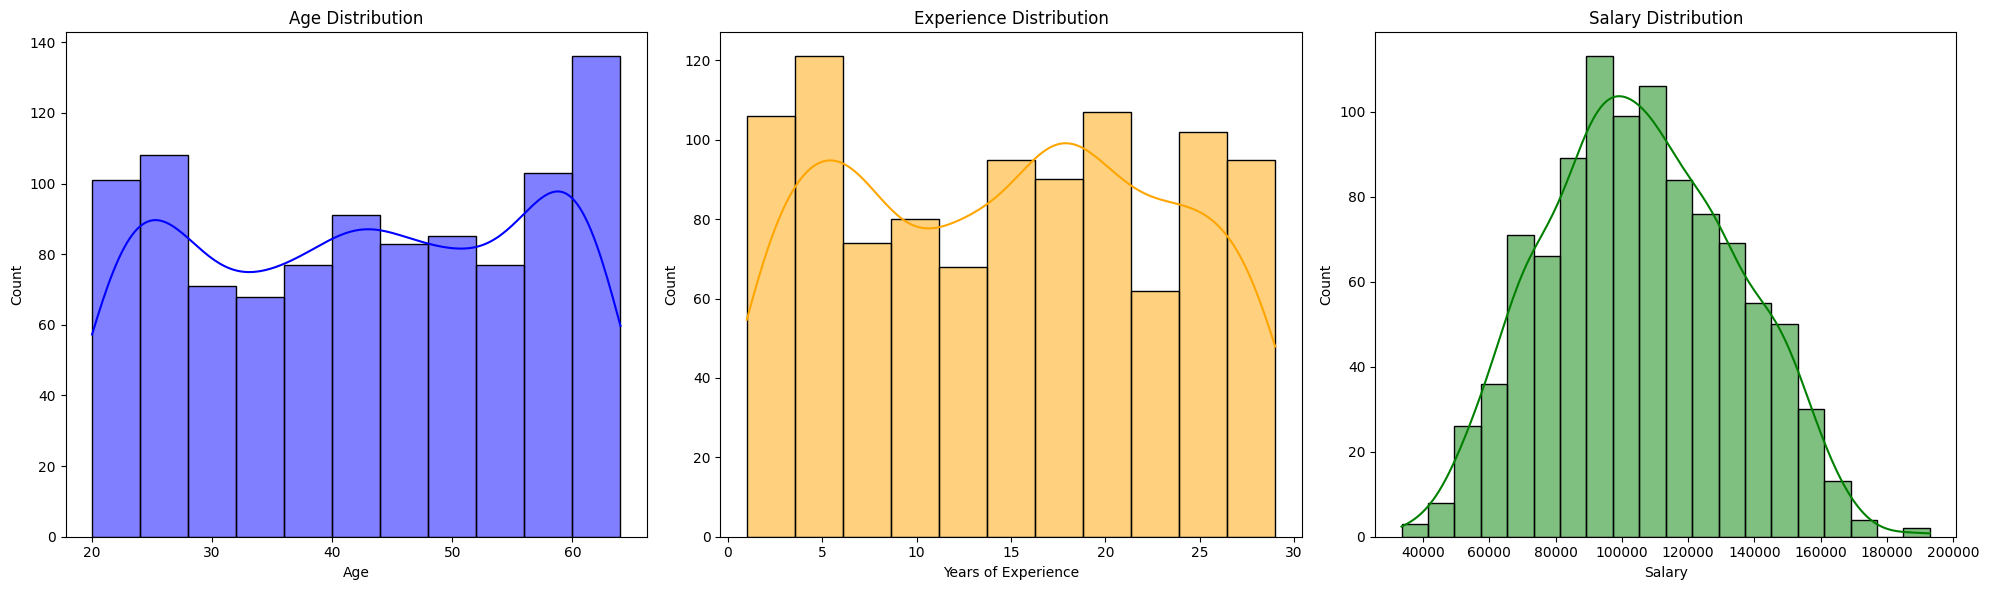

In [9]:
# Data Distribution of Continuous features

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Create a histogram of Age in the first subplot
sns.histplot(df['Age'], ax=ax[0], color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience in the second subplot
sns.histplot(df['Experience'], ax=ax[1], color='orange', kde=True)
ax[1].set_title('Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Create a histogram of Salary in the third subplot
sns.histplot(df['Salary'], ax=ax[2], color='green', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()


**Distribution of Continuous Data**

1. **Age Distribution:** The workforce ranges from **20 to 65** years, with peaks at **20-30** (early-career professionals) and **55-65** (senior employees). The middle group **(30-55 years)** is evenly distributed, indicating a balanced mix of fresh ideas and seasoned expertise.

2. **Experience Distribution:** Experience spans **0 to 30** years, with most employees having **7-22** years. Early-career professionals **(0-5 years)** form a smaller group, while long-tenured employees **(>25 years)** are few, suggesting a focus on mid- to senior-level expertise.

3. **Salary Distribution:** Salaries are centered around **100,000**,
 following a normal distribution. Most employees earn between **90,000-110,000**, reflecting a fair and standardized pay structure, with outliers likely tied to seniority or specialization.



In [10]:
# Encode categorical variables using LabelEncoder

le = LabelEncoder()

for feature in discrete_features:
    df[feature] = le.fit_transform(df[feature])

df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,8,2,3,63,1,84620.053665
1,3,11,1,1,59,1,142591.255894
2,0,28,1,3,61,0,97800.255404
3,1,29,0,1,45,1,96834.671282
4,3,25,2,0,26,0,132157.786175


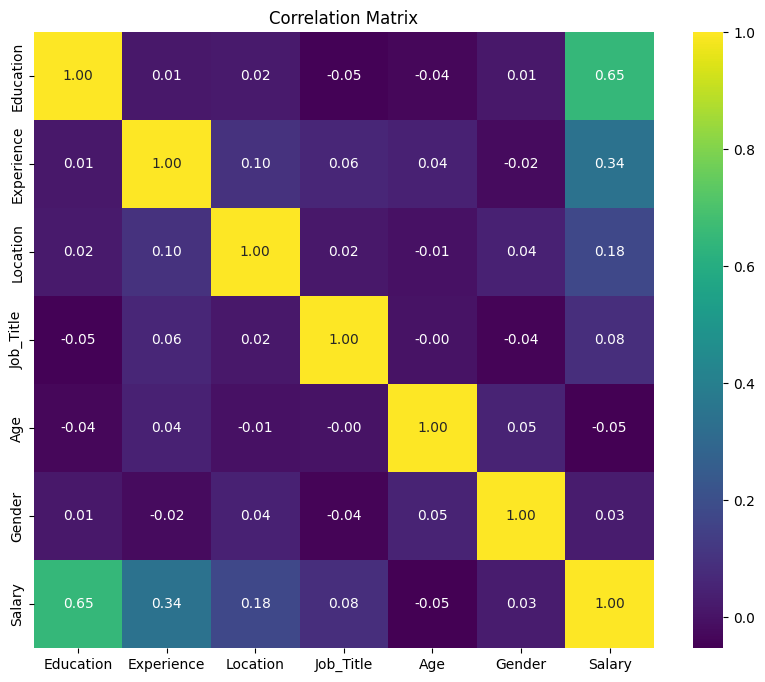

In [11]:
# Plot correlation matrix to identify relationships between features

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Correlation Matrix Analysis:**

The correlation matrix helps in understanding the relationships between different features in the dataset. By analyzing the correlations among the features, we observe the following:

1. Salary is most strongly correlated with Education, suggesting that education has a significant impact on salary.

2. Experience also shows a strong positive correlation with Salary while Location and Job Type influence Salary but to a lesser extent compared to Education and Experience.


In [12]:
# Splitting the dataset into features (X) and target (y)

X = df.drop('Salary', axis=1)
y = df['Salary']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(800, 6)

# Model Selection

Four models are initially evaluated, using GridSearchCV for hyperparameter tuning to identify the most appropriate model with the appropriate parameters.

1. Linear Regression
2. Random Forest
3. Decision Tree
4. XGBoost (Outperforms other models)

**❗N.B :** If any error occurs during param-tuning using GridSearchCV and scikit-learn version is >= 1.3.2, try downgrading it to 1.3.2

In [13]:
# A dictionary of models with their corresponding hyperparameters for GridSearchCV

model_params = {
    'Linear_Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision_Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [2, 4, 6, 8, 10],
            'random_state': [0, 42],
            'min_samples_split': [2, 5, 10, 20]
        }
    },
    'Random_Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 30, 50, 80, 100]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7, 10],
            'random_state': [0, 42]
        }
    }
}

In [ ]:
# Check sk-learn version

!pip show scikit-learn

In [ ]:
# Uninstall scikit-learn and install a spicific version of sk-learn

!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.2

In [16]:
# Hyper-parameter tuning using GridSearchCV

score=[]

for model_name, config in model_params.items():
    model = config['model']
    params = config['params']

    clf = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
    clf.fit(X_train,y_train)

    score.append({
        'Model':model_name,
        'Params':clf.best_params_,
        'MSE(-ve)':clf.best_score_
    })

# Sort models based on MSE(-ve) (Best to Worst)
pd.DataFrame(score).sort_values(by = 'MSE(-ve)', ascending=False)

,Model,Params,MSE(-ve)
3,XGBoost,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",-1.093110e+08
2,Random_Forest,{'n_estimators': 80},-1.333138e+08
1,Decision_Tree,"{'max_depth': 6, 'min_samples_split': 20, 'ran...",-1.445628e+08
0,Linear_Regression,{},-3.566350e+08


In [17]:
# XGBoost Regression model

xgb = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=0)
xgb.fit(X_train, y_train)

xgb.score(X_test, y_test)

0.8657099762001228

In [19]:
# Random Forest model

rf = RandomForestRegressor(n_estimators=80)
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.8471050603475729

In [20]:
# Decision Tree model

dt = DecisionTreeRegressor(max_depth=6, min_samples_split=20, random_state=0)
dt.fit(X_train, y_train)

dt.score(X_test, y_test)

0.8394694481136868

In [21]:
# Linear Regression model

lr = LinearRegression()
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.5665022841217893

# Performance Analysis

Since this is a regression task, the models are evaluated using three common performance metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE).

Among the models tested, **XGBoost outperformed the others**, achieving the lowest errors and the highest R² score. Random Forest performed comparably well, followed by Decision Tree and Linear Regression.

In [22]:
# Lists to store MAE, MSE and RMSE values

mae_values = []
mse_values = []
rmse_values = []

models = {
    'XGBoost': xgb,
    'Random Forest': rf,
    'Decision Tree': dt,
    'Linear Regression': lr
}

print(f"{'Model':<20}{'MAE':<15}{'MSE':<15}{'RMSE':<15}")

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)

    # print the values for each models
    print(f"{model_name:<20}{mae:<15.4f}{mse:<15.4f}{rmse:<15.4f}")

Model               MAE            MSE            RMSE           
XGBoost             8458.6427      109651370.5698 10471.4550     
Random Forest       9286.4102      126924265.4712 11266.0670     
Decision Tree       9147.0955      131077458.5824 11448.9064     
Linear Regression   15458.8275     353962396.7581 18813.8884     


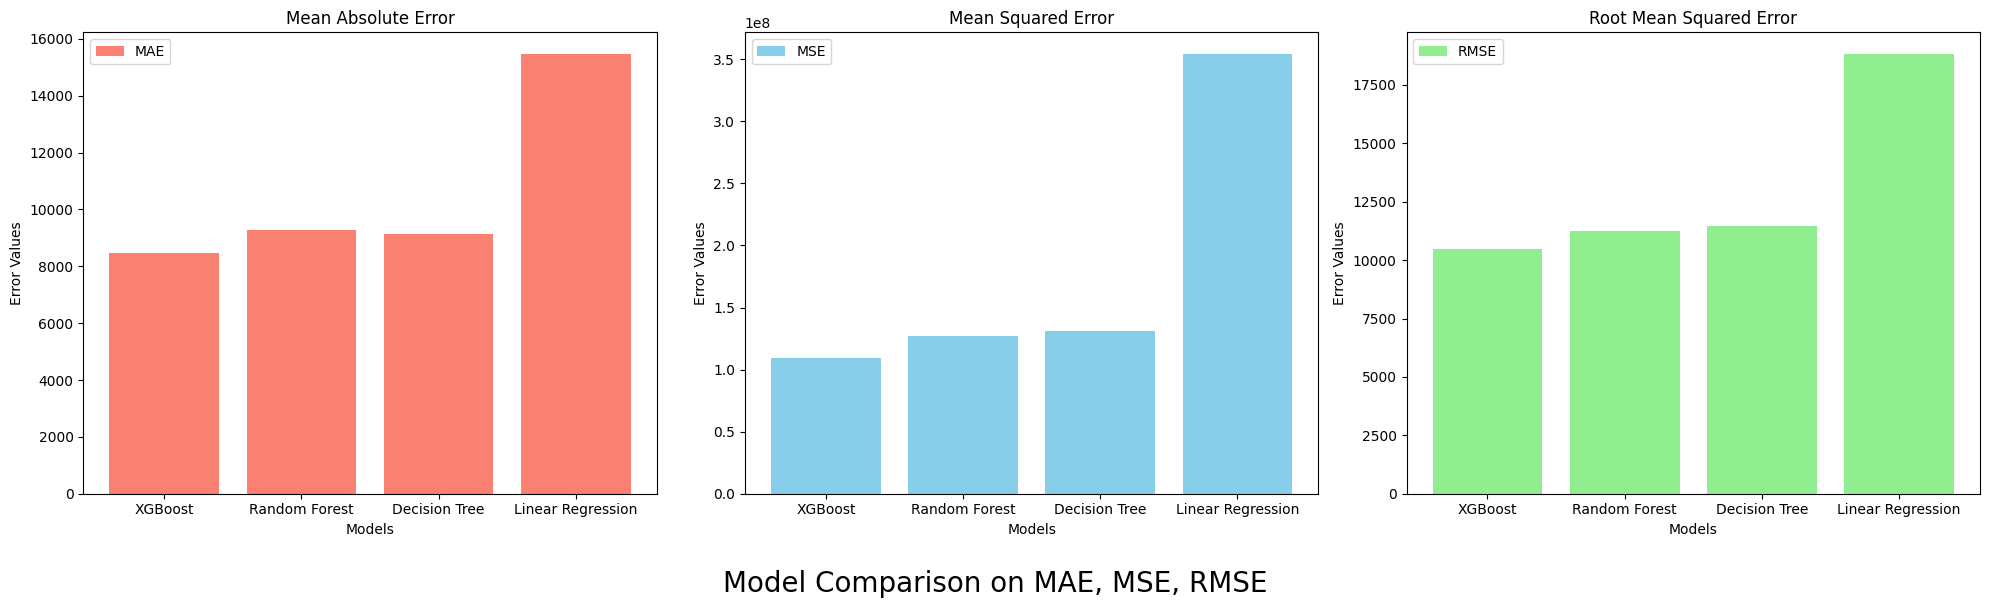

In [23]:
# Plotting the comparison
x = np.arange(len(models))  # x-axis for the models

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# bar_width = 0.2
index = np.arange(len(models))

# Create bars for each metric
ax[0].bar(index, mae_values, label='MAE', color='salmon')
ax[1].bar(index, mse_values, label='MSE', color='skyblue')
ax[2].bar(index, rmse_values, label='RMSE', color='lightgreen')

# Set labels and titles for each subplot
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Error Values')
ax[0].set_title('Mean Absolute Error')

ax[1].set_xlabel('Models')
ax[1].set_ylabel('Error Values')
ax[1].set_title('Mean Squared Error')

ax[2].set_xlabel('Models')
ax[2].set_ylabel('Error Values')
ax[2].set_title('Root Mean Squared Error')

# Set x-ticks and labels
for a in ax:
    a.set_xticks(index)
    a.set_xticklabels(models.keys())
    a.legend()

# Add overall title at the bottom
fig.suptitle('Model Comparison on MAE, MSE, RMSE', fontsize=20, y=-0.03)

# Display the plot
plt.tight_layout()
plt.show()

## XGBoost - Performance Analysis

Since XGBoost Regressor outperformed the other models, let's further analyze XGBoost's performance by visualising Actual vs Predited data and Error distribution.

In [24]:
y_pred = xgb.predict(X_test)

In [25]:
print("R2 Score : ", r2_score(y_test, y_pred))
print("Mean Absolute Error : ", mae_values[0])
print("Mean Squared Error : ", mse_values[0])
print("Root Mean Squared Error : ", rmse_values[0])

R2 Score :  0.8657099762001228
Mean Absolute Error :  8458.642690983525
Mean Squared Error :  109651370.56977563
Root Mean Squared Error :  10471.455035942981


In [26]:
# Get the residuals to plot Error distribution

residuals = y_test - y_pred

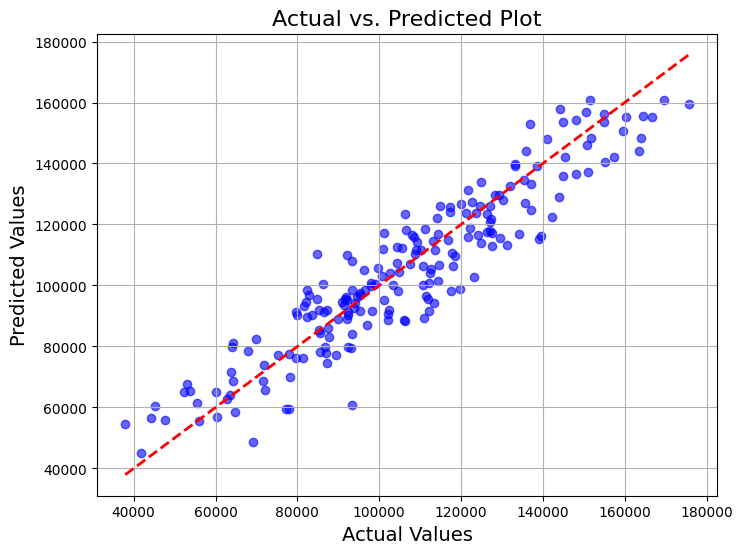

In [27]:
# Actual vs. Predicted Plot

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Plot', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.grid(True)
plt.show()

**Actual vs Predicted Plot:**

This scatter plot shows data points near the 45-degree line, indicating a good fit between the model’s predictions and actual values.

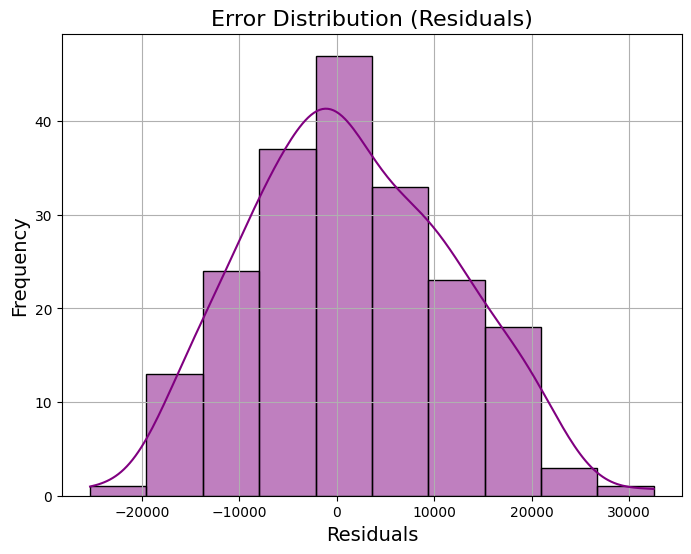

In [28]:
# Error Distribution (Histogram and Density Plot)

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=10)
plt.title('Error Distribution (Residuals)', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

**Error Distribution Plot:**

A histogram or density plot of residuals is displayed, which should ideally resemble a bell-shaped curve, signifying that the model's errors are normally distributed — a positive indicator of model performance.

# About


## Job Salary Prediction

#### **1. Goal:**

The objective is to **predict salaries** based on factors such as age, gender, education level, job title, location, and work experience.

#### **2. Dataset :**

The dataset used for this task (Job Salary Prediction) consists 7 features and 1000 rows. It includes a mix of categorical and continuous variables, with Salary as the target variable. Then missing or duplicate values are checked to ensure data quality.

**Dataset:** [Job Salary Prediction Data - Kaggle](https://www.kaggle.com/datasets/mrsimple07/salary-prediction-data/data)

#### **3. Dataset Preprocessing :**

The first step involves importing necessary libraries and loading the dataset for further processing. Then missing or duplicate values are checked to ensure data quality.

Exploratory data analysis and correlation analysis is performed to gain insights into relationships between the features. Categorical variables are encoded using label encoding to convert them into numerical values, making them suitable for machine learning models.

The dataset is split into training **(80%) and test (20%) sets** to train and evaluate the model effectively.

#### **4. Model Selection :**

The aim is to find the most suitable models for predicting salary (Regression problem), four traditional machine learning models are evaluated: Linear Regression, Decision Tree, Random Forest, and XGBoost. The dataset is relatively small which is why neural networks are avoided, as they tend to be computationally expensive and prone to overfitting on smaller datasets.

For model optimization, GridSearchCV is used, an automated hyperparameter tuning technique, with the neg_mean_squared_error scoring metric to identify the best model with optimal parameters.

#### **5. Model Evaluation:**

Since this is a regression task, the models are evaluated using three common performance metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE).

Among the models tested, **XGBoost outperformed** the other models, achieving the **lowest errors** and the **highest R² score**. Random Forest performed comparably well, followed by Decision Tree and Linear Regression. To further analyze XGBoost's performance, the actual vs predicted data points plot and error distribution plot is shown.

#### **6. Performance Insights :**

Out of the four models, the XGBoost model demonstrated strong predictive capability, achieving an R² of 0.87, which indicates that **87% of the variance in Salary is explained by the model**.

- **Mean Absolute Error:** 8458.64
- **Mean Squared Error:** 109651370.57
- **Root Mean Squared Error:** 10471.45
- **R² Score:** 0.87 (87%)

- **Actual vs Predicted Plot:** This scatter plot shows data points near the 45-degree line, indicating a good fit between the model’s predictions and actual values.
- **Error Distribution Plot:** A histogram or density plot of residuals is displayed, which should ideally resemble a bell-shaped curve, signifying that the model's errors are normally distributed — a positive indicator of model performance.

#### **7. Key Challenges :**

Since the dataset was balanced and cleaned, no significant challenges were encountered during data preprocessing. However, tuning hyperparameters to select the most suitable model and achieve optimal results posed a challenges.

#### **8. Potential Areas for Improvement :**

1. **Dataset Size:** Increasing the dataset size often improves model performance, since this is a very small dataset.

2. **Model Tuning:** Further optimization and fine-tuning of the XGBoost model could potentially lead to even better results.